In [39]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0cb13c04-52ba-4924-85f8-047676b55a32',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-08-12T19:58:23.532Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9955}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9668, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [40]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [41]:
#normalizing data into a dataframe to make it more easily interpretable 
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)

In [89]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0cb13c04-52ba-4924-85f8-047676b55a32',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc=True)
    df = df.append(df2)
    
    #if not os.path.isfile('/Users/chizurokenwakanmalafilm/Documents/Python Scripts/API.csv'):
        #df.to_csv('/Users/chizurokenwakanmalafilm/Documents/Python Scripts/API.csv', header='column_names')
    #else:
         #df.to_csv('/Users/chizurokenwakanmalafilm/Documents/Python Scripts/API.csv', mode='a', header=False)
    

In [90]:
# a for loop that calls api and confirms it ran successfully then sleeps for 1 minute
import os 
from time import time
from time import sleep

for i in range(333): 
    api_runner()
    print('API Run completed successfully')
    sleep(60)
exit()

/var/folders/5t/dmmrfy6n2hdb0q2w1r06v8gh0000gn/T/ipykernel_3097/3972209172.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Run completed successfully


/var/folders/5t/dmmrfy6n2hdb0q2w1r06v8gh0000gn/T/ipykernel_3097/3972209172.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Run completed successfully


/var/folders/5t/dmmrfy6n2hdb0q2w1r06v8gh0000gn/T/ipykernel_3097/3972209172.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Run completed successfully


/var/folders/5t/dmmrfy6n2hdb0q2w1r06v8gh0000gn/T/ipykernel_3097/3972209172.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Run completed successfully


/var/folders/5t/dmmrfy6n2hdb0q2w1r06v8gh0000gn/T/ipykernel_3097/3972209172.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Run completed successfully


/var/folders/5t/dmmrfy6n2hdb0q2w1r06v8gh0000gn/T/ipykernel_3097/3972209172.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Run completed successfully


KeyboardInterrupt: 

In [ ]:
#df75 = pd.read_csv('/Users/chizurokenwakanmalafilm/Documents/Python Scripts/API.csv')
#df75

In [91]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9668,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19119812.00000,19119812.00000,NaN,1,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,24099.73639,26940243805.06407,-29.42370,-0.49616,-0.24635,5.09501,22.76465,1.87248,-18.36200,460782429051.40106,39.98190,506094464217.50000,NaN,2022-08-12T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 20:33:54.923661+00:00
1,1027,Ethereum,ETH,ethereum,5974,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121937639.49900,121937639.49900,NaN,2,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,1920.05301,16403578181.54602,-33.51970,-0.20720,1.40827,14.54144,78.24700,51.34068,-4.63809,234126731903.02319,20.30420,234126731903.01999,NaN,2022-08-12T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 20:33:54.923661+00:00
2,825,Tether,USDT,tether,38006,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66899962685.04855,69158976373.96588,NaN,3,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,1.00031,46107493685.04935,-29.64910,0.00046,-0.00785,0.02170,0.09908,0.15632,0.15473,66920965001.76205,5.80670,69180687876.74001,NaN,2022-08-12T20:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-12 20:33:54.923661+00:00
3,3408,USD Coin,USDC,usd-coin,5619,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,53774171250.65833,53774171250.65833,NaN,4,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,0.99991,6526944638.33072,-20.80630,-0.00923,-0.02048,-0.00406,-0.03100,-0.08325,-0.03129,53769222889.11053,4.66470,53769222889.11000,NaN,2022-08-12T20:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-12 20:33:54.923661+00:00
4,1839,BNB,BNB,bnb,1063,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,324.22753,990727767.53444,-36.05160,-0.40371,-0.57632,3.61895,44.22382,40.40866,12.04950,52309981475.89885,4.53650,64845505771.56000,NaN,2022-08-12T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 20:33:54.923661+00:00
5,52,XRP,XRP,xrp,792,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,49139217191.00000,99989371889.00000,NaN,6,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,0.37628,934916041.68889,-14.37520,-0.07809,-1.11575,1.53949,18.63567,14.85972,-9.51436,18490085915.67802,1.60410,37627961885.94000,NaN,2022-08-12T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 20:33:54.923661+00:00
6,2010,Cardano,ADA,cardano,545,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33752565071.28800,34277702081.60500,NaN,7,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,0.53663,539873660.59347,-34.59550,-0.25104,0.51465,5.00817,27.26043,9.20440,2.83123,18112764610.69574,1.57140,24148517475.93000,NaN,2022-08-12T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 20:33:54.923661+00:00
7,4687,Binance USD,BUSD,binance-usd,4636,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17634731820.82925,17634731820.82925,NaN,8,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,1.00003,5090069015.09706,-30.49280,0.01738,-0.00581,0.00698,-0.19460,-0.16230,0.00982,17635295927.12217,1.52940,17635295927.12000,NaN,2022-08-12T20:32:00.000Z,1839.00000,B

In [92]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [93]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9668,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19119812.00000,19119812.00000,NaN,1,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,24099.73639,26940243805.06407,-29.42370,-0.49616,-0.24635,5.09501,22.76465,1.87248,-18.36200,460782429051.40106,39.98190,506094464217.50000,NaN,2022-08-12T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 20:33:54.923661+00:00
1,1027,Ethereum,ETH,ethereum,5974,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121937639.49900,121937639.49900,NaN,2,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,1920.05301,16403578181.54602,-33.51970,-0.20720,1.40827,14.54144,78.24700,51.34068,-4.63809,234126731903.02319,20.30420,234126731903.01999,NaN,2022-08-12T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 20:33:54.923661+00:00
2,825,Tether,USDT,tether,38006,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66899962685.04855,69158976373.96588,NaN,3,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,1.00031,46107493685.04935,-29.64910,0.00046,-0.00785,0.02170,0.09908,0.15632,0.15473,66920965001.76205,5.80670,69180687876.74001,NaN,2022-08-12T20:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-12 20:33:54.923661+00:00
3,3408,USD Coin,USDC,usd-coin,5619,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,53774171250.65833,53774171250.65833,NaN,4,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,0.99991,6526944638.33072,-20.80630,-0.00923,-0.02048,-0.00406,-0.03100,-0.08325,-0.03129,53769222889.11053,4.66470,53769222889.11000,NaN,2022-08-12T20:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-12 20:33:54.923661+00:00
4,1839,BNB,BNB,bnb,1063,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,324.22753,990727767.53444,-36.05160,-0.40371,-0.57632,3.61895,44.22382,40.40866,12.04950,52309981475.89885,4.53650,64845505771.56000,NaN,2022-08-12T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 20:33:54.923661+00:00
5,52,XRP,XRP,xrp,792,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,49139217191.00000,99989371889.00000,NaN,6,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,0.37628,934916041.68889,-14.37520,-0.07809,-1.11575,1.53949,18.63567,14.85972,-9.51436,18490085915.67802,1.60410,37627961885.94000,NaN,2022-08-12T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 20:33:54.923661+00:00
6,2010,Cardano,ADA,cardano,545,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33752565071.28800,34277702081.60500,NaN,7,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,0.53663,539873660.59347,-34.59550,-0.25104,0.51465,5.00817,27.26043,9.20440,2.83123,18112764610.69574,1.57140,24148517475.93000,NaN,2022-08-12T20:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-12 20:33:54.923661+00:00
7,4687,Binance USD,BUSD,binance-usd,4636,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17634731820.82925,17634731820.82925,NaN,8,NaN,NaN,NaN,2022-08-12T20:32:00.000Z,1.00003,5090069015.09706,-30.49280,0.01738,-0.00581,0.00698,-0.19460,-0.16230,0.00982,17635295927.12217,1.52940,17635295927.12000,NaN,2022-08-12T20:32:00.000Z,1839.00000,B

In [94]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.44066,-0.31419,5.06495,22.68562,2.31449,-18.20721
Ethereum,-0.09079,1.39636,14.61703,78.30996,51.98961,-4.40139
Tether,-0.00179,-0.00653,0.02507,0.10125,0.16235,0.15041
USD Coin,-0.00097,-0.01180,-0.00260,-0.01751,-0.03486,-0.00909
BNB,-0.32796,-0.58101,3.61359,44.27736,41.01600,12.27218
XRP,-0.06422,-1.18273,1.53986,18.44495,15.32532,-9.37835
Cardano,-0.26531,0.33281,4.89326,27.17017,9.91272,3.07484
Binance USD,0.02237,-0.00135,0.00931,-0.06918,-0.15665,-0.02565
Solana,0.19760,3.00739,11.32141,32.63516,51.84302,-11.12610


In [95]:
df4 = df3.stack()
df4

name                                          
Bitcoin           quote.USD.percent_change_1h     -0.44066
                  quote.USD.percent_change_24h    -0.31419
                  quote.USD.percent_change_7d      5.06495
                  quote.USD.percent_change_30d    22.68562
                  quote.USD.percent_change_60d     2.31449
                  quote.USD.percent_change_90d   -18.20721
Ethereum          quote.USD.percent_change_1h     -0.09079
                  quote.USD.percent_change_24h     1.39636
                  quote.USD.percent_change_7d     14.61703
                  quote.USD.percent_change_30d    78.30996
                  quote.USD.percent_change_60d    51.98961
                  quote.USD.percent_change_90d    -4.40139
Tether            quote.USD.percent_change_1h     -0.00179
                  quote.USD.percent_change_24h    -0.00653
                  quote.USD.percent_change_7d      0.02507
                  quote.USD.percent_change_30d     0.10125
         

In [96]:
df5 = df4.to_frame(name='values')
df5

values
name                                                   
Bitcoin          quote.USD.percent_change_1h   -0.44066
                 quote.USD.percent_change_24h  -0.31419
                 quote.USD.percent_change_7d    5.06495
                 quote.USD.percent_change_30d  22.68562
                 quote.USD.percent_change_60d   2.31449
                 quote.USD.percent_change_90d -18.20721
Ethereum         quote.USD.percent_change_1h   -0.09079
                 quote.USD.percent_change_24h   1.39636
                 quote.USD.percent_change_7d   14.61703
                 quote.USD.percent_change_30d  78.30996
                 quote.USD.percent_change_60d  51.98961
                 quote.USD.percent_change_90d  -4.40139
Tether           quote.USD.percent_change_1h   -0.00179
                 quote.USD.percent_change_24h  -0.00653
                 quote.USD.percent_change_7d    0.02507
                 quote.USD.percent_change_30d   0.10125
                 quote.USD.percent_change_60d   0.16235
                 quote.USD.percent_change_90d   0.15041
USD Coin         quote.USD.percent_change_1h   -0.00097
                 quote.USD.percent_change_24h  -0.01180
                 quote.USD.percent_change_7d   -0.00260
                 quote.USD.percent_change_30d  -0.01751
                 quote.USD.percent_change_60d  -0.03486
                 quote.USD.percent_change_90d  -0.00909
BNB              quote.USD.percent_change_1h   -0.32796
                 quote.USD.percent_change_24h  -0.58101
                 quote.USD.percent_change_7d    3.61359
                 quote.USD.percent_change_30d  44.27736
                 quote.USD.percent_change_60d  41.01600
                 quote.USD.percent_change_90d  12.27218
XRP              quote.USD.percent_change_1h   -0.06422
                 quote.USD.percent_change_24h  -1.18273
                 quote.USD.percent_change_7d    1.53986
                 quote.USD.percent_change_30d  18.44495
                 quote.USD.percent_change_60d  15.32532
                 quote.USD.percent_change_90d  -9.37835
Cardano          quote.USD.percent_change_1h   -0.26531
                 quote.USD.percent_change_24h   0.33281
                 quote.USD.percent_change_7d    4.89326
                 quote.USD.percent_change_30d  27.17017
                 quote.USD.percent_change_60d   9.91272
                 quote.USD.percent_change_90d   3.07484
Binance USD      quote.USD.percent_change_1h    0.02237
                 quote.USD.percent_change_24h  -0.00135
                 quote.USD.percent_change_7d    0.00931
                 quote.USD.percent_change_30d  -0.06918
                 quote.USD.percent_change_60d  -0.15665
                 quote.USD.percent_change_90d  -0.02565
Solana           quote.USD.percent_change_1h    0.19760
                 quote.USD.percent_change_24h   3.00739
                 quote.USD.percent_change_7d   11.32141
                 quote.USD.percent_change_30d  32.63516
                 quote.USD.percent_change_60d  51.84302
                 quote.USD.percent_change_90d -11.12610
Polkadot         quote.USD.percent_change_1h   -0.91279
                 quote.USD.percent_change_24h   0.30575
                 quote.USD.percent_change_7d    9.41347
                 quote.USD.percent_change_30d  48.30968
                 quote.USD.percent_change_60d  30.53598
                 quote.USD.percent_change_90d -16.26130
Dogecoin         quote.USD.percent_change_1h   -0.33065
                 quote.USD.percent_change_24h   0.39642
                 quote.USD.percent_change_7d    3.56772
                 quote.USD.percent_change_30d  18.95623
                 quote.USD.percent_change_60d  25.67220
                 quote.USD.percent_change_90d -18.09197
Avalanche        quote.USD.percent_change_1h   -0.54685
                 quote.USD.percent_change_24h   0.64001
                 quote.USD.percent_change_7d   19.74173
                 quote.USD.percent_change_30d  61.58915
                 

In [97]:
df5.count()

values    120
dtype: int64

In [98]:
index = pd.Index(range(120))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.44066
1,Bitcoin,quote.USD.percent_change_24h,-0.31419
2,Bitcoin,quote.USD.percent_change_7d,5.06495
3,Bitcoin,quote.USD.percent_change_30d,22.68562
4,Bitcoin,quote.USD.percent_change_60d,2.31449
5,Bitcoin,quote.USD.percent_change_90d,-18.20721
6,Ethereum,quote.USD.percent_change_1h,-0.09079
7,Ethereum,quote.USD.percent_change_24h,1.39636
8,Ethereum,quote.USD.percent_change_7d,14.61703
9,Ethereum,quote.USD.percent_change_30d,78.30996


In [99]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.44066
1,Bitcoin,quote.USD.percent_change_24h,-0.31419
2,Bitcoin,quote.USD.percent_change_7d,5.06495
3,Bitcoin,quote.USD.percent_change_30d,22.68562
4,Bitcoin,quote.USD.percent_change_60d,2.31449
5,Bitcoin,quote.USD.percent_change_90d,-18.20721
6,Ethereum,quote.USD.percent_change_1h,-0.09079
7,Ethereum,quote.USD.percent_change_24h,1.39636
8,Ethereum,quote.USD.percent_change_7d,14.61703
9,Ethereum,quote.USD.percent_change_30d,78.30996


In [100]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.44066
1,Bitcoin,24h,-0.31419
2,Bitcoin,7d,5.06495
3,Bitcoin,30d,22.68562
4,Bitcoin,60d,2.31449
5,Bitcoin,90d,-18.20721
6,Ethereum,quote.USD.percent_change_1h,-0.09079
7,Ethereum,24h,1.39636
8,Ethereum,7d,14.61703
9,Ethereum,30d,78.30996


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

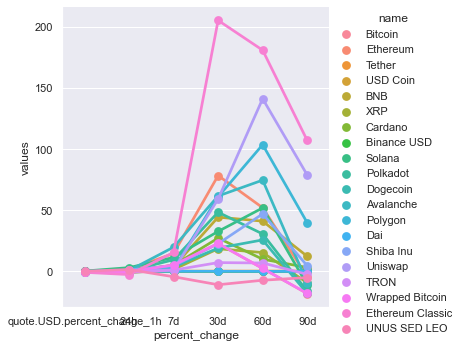

In [102]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [121]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10 = df10[df10.index.duplicated()]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,24095.19426,2022-08-12 20:37:33.671516+00:00
0,Bitcoin,24093.09649,2022-08-12 20:38:34.228218+00:00
0,Bitcoin,24101.87365,2022-08-12 20:39:34.531318+00:00
0,Bitcoin,24101.93570,2022-08-12 20:40:34.816227+00:00
0,Bitcoin,24109.45560,2022-08-12 20:41:35.331887+00:00
0,Bitcoin,24107.21947,2022-08-12 20:42:35.848892+00:00


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

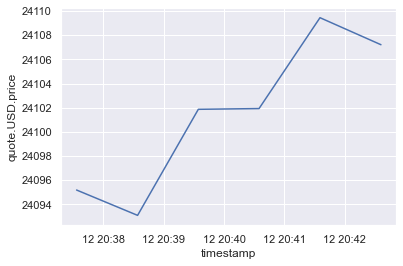

In [126]:
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10.reset_index())